<a href="https://www.kaggle.com/desmondrn/morebikes-deep-neural-network?scriptVersionId=84971811" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
%reset -f

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.linear_model import PoissonRegressor

import joblib

import tensorflow as tf
mae = tf.keras.losses.MeanAbsoluteError()    ## The main loss for this task

import os

INPUT_DIR = '/kaggle/input/morebikes2021'

FEATURE_SET = 'short_full_temp'   ## Change here !
SHUFFLE_SAMPLES = True
TRAIN_SIZE = 0.95

## Build all per-station models

In [3]:
def get_peters_features():
    short = ['bikes_3h_ago', 'short_profile_3h_diff_bikes', 'short_profile_bikes']
    short_temp = short + ['temperature.C']
    full = ['bikes_3h_ago', 'full_profile_3h_diff_bikes', 'full_profile_bikes']
    full_temp = full + ['temperature.C']
    short_full = ['bikes_3h_ago', 'short_profile_3h_diff_bikes', 'short_profile_bikes', 'full_profile_3h_diff_bikes', 'full_profile_bikes']
    short_full_temp = short_full + ['temperature.C']
    
    if FEATURE_SET=='short':
        return short
    elif FEATURE_SET=='short_temp':
        return short_temp
    elif FEATURE_SET=='full':
        return full
    elif FEATURE_SET=='full_temp':
        return full_temp
    elif FEATURE_SET=='short_full':
        return short_full
    elif FEATURE_SET=='short_full_temp':
        return short_full_temp
    else:
        return 'all'

def get_train_path(station_id):
    return INPUT_DIR+'/Train/Train/station_'+str(station_id)+'_deploy.csv'

def preprocess(df):
    df = df.drop(['weekday', 'latitude', 'longitude','year', 'month'], axis=1)
#     df = df.drop(['numDocks'], axis=1)
    df = df.drop(['station'], axis=1)
    df['timestamp'] = (df['timestamp'] - 1412114400) / 3600
    return df

def select_peters_features(df):
    features_to_use = get_peters_features()
        
    if features_to_use == 'all':
        return df.dropna()
    else:
#         features_to_use += ['numDocks']         #### Remember to remove this !
        if 'bikes' in list(df.columns):
            features_to_use += ['bikes']
        return df[features_to_use].dropna()
    
def make_learning_data(station_id):
    df = pd.read_csv(get_train_path(station_id))
    
    df = preprocess(df)
#     df = df.sample(frac=1, random_state=12)

    df = select_peters_features(df)

    df_y = df['bikes']
    df_X = df.drop(['bikes'], axis=1)

    return np.array(df_X), np.array(df_y)

# df = make_learning_data(201)
# df

In [4]:
MAX_DOCKS = 27
def plot_loss_evol(history):
    fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(18, 5))

    # summarize history for accuracy
    ax1.plot(history.history['sparse_categorical_accuracy'])
    ax1.plot(history.history['val_sparse_categorical_accuracy'])
    ax1.set_title('KerasNet accuracy')
    ax1.set_ylabel('accuracy')
    ax1.set_xlabel('epochs')
    ax1.legend(['train', 'val'], loc='upper left')

    # summarize history for loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('KerasNet loss')
    ax2.set_ylabel('loss')
    ax2.set_xlabel('epochs')
    ax2.legend(['train', 'val'], loc='upper right')
    
    plt.show();
    

def train_bikes_models(X_train, X_val, y_train, y_val, station_id=0):
    """
    @station_id: id of the station we want to train
    return the best model for this station
    """

    """ All models that will be trained and their scores """
    potential_models = []

    """### Linear Regression"""

#     degrees = [1, 2, 3]
#     degrees = [1]
#     for i in range(len(degrees)):
#         scaled_features = StandardScaler()
#         polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
# #         linear_regression = LinearRegression()
# #         linear_regression = Lasso()
#         linear_regression = Ridge()
#         pipeline = Pipeline(
#             [
#                 ("scaled_features", scaled_features),
#                 ("polynomial_features", polynomial_features),
#                 ("linear_regression", linear_regression),
#             ]
#         )
#         pipeline.fit(X_train, y_train)
#         y_pred = np.rint(pipeline.predict(X_val))
#         potential_models.append(('linear_reg_'+str(degrees[i]), pipeline, mae(y_val, y_pred).numpy()))

    """### K-Nearest Neighbors"""

#     KNN = KNeighborsClassifier(n_neighbors=2)
#     KNN.fit(X_train, y_train)
#     y_pred = KNN.predict(X_val)
#     potential_models.append(('knn', KNN, mae(y_val, y_pred).numpy()))

    """### Logistic regression"""

    """ From here on, scale the data between 0 and 1"""
#     scaler = MinMaxScaler()
#     X = scaler.fit_transform(X)
#     X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=None, train_size=0.75)
#     LogReg = LogisticRegressionCV(multi_class='multinomial')
#     LogReg = pipeline = Pipeline([("minmax_scaler", MinMaxScaler()), ("logistic_reg", LogisticRegressionCV(multi_class='multinomial'))])
#     LogReg.fit(X_train, y_train)
#     y_pred = LogReg.predict(X_val)
#     potential_models.append(('logistic_reg', DcTree, mae(y_val, y_pred).numpy()))

    """### Decision Tree"""

#     DcTree = Pipeline([("minmax_scaler", MinMaxScaler()), ("decision_tree", DecisionTreeClassifier(random_state=12))])
#     DcTree.fit(X_train, y_train)
#     y_pred = DcTree.predict(X_val)
#     potential_models.append(('decision_tree', DcTree, mae(y_val, y_pred).numpy()))

    """### Random Forest"""

#     RdFor = Pipeline([("minmax_scaler", MinMaxScaler()), ("random_forest", RandomForestClassifier(n_estimators=100, max_leaf_nodes=None, n_jobs=-1, random_state=12))])
#     RdFor.fit(X_train, y_train)
#     y_pred = RdFor.predict(X_val)
#     potential_models.append(('random_forest', RdFor, mae(y_val, y_pred).numpy()))

    """### SVM - One vs. Rest"""

#     SVM1 = Pipeline([("minmax_scaler", MinMaxScaler()), ("svm_ovr", OneVsRestClassifier(LinearSVC(random_state=12)))])
#     SVM1.fit(X_train, y_train)
#     y_pred = SVM1.predict(X_val)
#     potential_models.append(('svm_ovr', SVM1, mae(y_val, y_pred).numpy()))

    """### SVM - One vs. One"""

#     SVM2 = Pipeline([("minmax_scaler", MinMaxScaler()), ("svm_ovo", OneVsOneClassifier(SVC(random_state=12)))])
#     SVM2.fit(X_train, y_train)
#     y_pred = SVM2.predict(X_val)
#     potential_models.append(('svm_ovo', SVM2, mae(y_val, y_pred).numpy()))
    
    """### Poisson Regression """

#     Poisreg = Pipeline([("minmax_scaler", MinMaxScaler()), ("pois_reg", PoissonRegressor())])
#     Poisreg.fit(X_train, y_train)
#     y_pred = Poisreg.predict(X_val)
#     potential_models.append(('pois_reg', Poisreg, mae(y_val, y_pred).numpy()))

    """### Neural Network"""

    """ Define the model  """
    KerasNet = tf.keras.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(4096, activation='relu'),
            tf.keras.layers.Dense(1024, activation='relu'),
            tf.keras.layers.Dense(MAX_DOCKS+1, activation='softmax')        
        ])
    KerasNet(X_train)
    """ Compile the model  """
    KerasNet.compile(
        loss=tf.losses.sparse_categorical_crossentropy,
        optimizer=tf.optimizers.Adam(5e-5),
        metrics=[tf.metrics.sparse_categorical_accuracy])
    """ Train the mode """
    history = KerasNet.fit(
        X_train,
        y_train,
        batch_size=300,
        epochs=150,
        verbose=0,
        # steps_per_epoch=100,
        validation_data=(X_val, y_val),
    )
    plot_loss_evol(history)
    """ Make a few predictions """
    # Generate predictions on new data
    y_hat_pred_proba = KerasNet.predict(X_val)
    y_pred = tf.cast(tf.argmax(y_hat_pred_proba, axis=1), tf.int32)
    ## Add to potential models
    potential_models.append(('neural_net', KerasNet, mae(y_val, y_pred).numpy()))


    """## Sort the models and pick the best"""
    potential_models = sorted(potential_models, key=lambda el:el[2])

    ## Save the best model
#     if potential_models[0][0] != 'neural_net':
#         save_name = str(station_id)+'_'+potential_models[0][0]+'.pkl'
#         joblib.dump(potential_models[0][1], save_name)
#     else:
#         save_name = str(station_id)+'_'+potential_models[0][0]+'.h5'
#         potential_models[0][1].save(save_name)

    ## The best model is
#     return (save_name, potential_models[0][1], potential_models[0][2])    
    return potential_models[0]

In [5]:
# %%capture

# per_station_models = {}

# for station_id in range(201, 276):
#     X, y = make_learning_data(station_id)
#     MAX_DOCKS = np.max(y)
#     X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=SHUFFLE_SAMPLES, train_size=TRAIN_SIZE)
#     per_station_models[station_id] = train_bikes_models(X_train, X_val, y_train, y_val)[1]

In [6]:
# per_station_models

In [7]:
### Remove this afterwards
# per_station_models[201].named_steps['linear_regression'].coef_

## Train and predict for all stations at once

In [8]:
X, y = make_learning_data(201) 
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=SHUFFLE_SAMPLES, train_size=TRAIN_SIZE)
stations = [201]*len(y_val)

for station_id in range(202, 276):
    X_, y_ = make_learning_data(station_id) 
    X_train_, X_val_, y_train_, y_val_ = train_test_split(X_, y_, shuffle=SHUFFLE_SAMPLES, train_size=TRAIN_SIZE)
    
    X_train = np.vstack([X_train, X_train_])
    X_val = np.vstack([X_val, X_val_])    
    y_train = np.concatenate([y_train, y_train_])    
    y_val = np.concatenate([y_val, y_val_])
    
    stations += [station_id]*len(y_val_)

MAX_DOCKS = max([np.max(y_train), np.max(y_val)])

In [9]:
## Save this data for later testing in Phase 2
np.save('X_val.npy', X_val)
np.save('y_val.npy', y_val)
np.save('stations_val.npy', np.array(stations))

In [10]:
## Shapes

print("All stations together:")
print("train:", X_train.shape, y_train.shape)
print("val:", X_val.shape, y_val.shape)

print("stations for each sample:", len(stations))

All stations together:
train: (40725, 6) (40725,)
val: (2175, 6) (2175,)
stations for each sample: 2175


2022-01-11 12:55:40.183381: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-11 12:55:40.271720: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-11 12:55:40.272441: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-11 12:55:40.273668: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

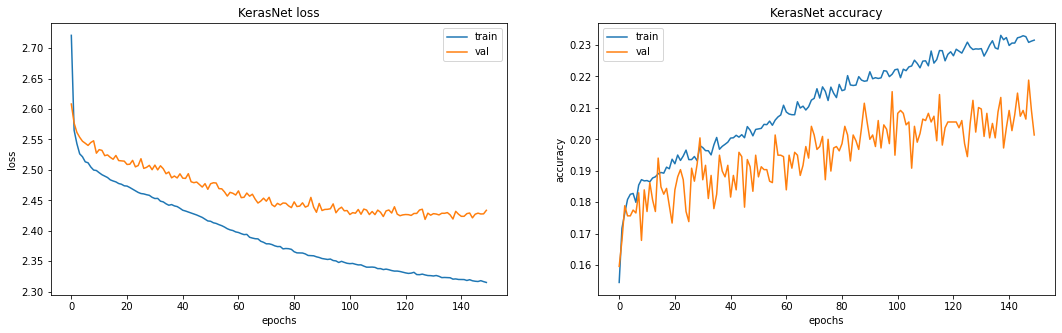

In [11]:
model_name, all_stations_model = train_bikes_models(X_train, X_val, y_train, y_val)[:2]

In [12]:
### Remove this afterwards
# all_stations_model.named_steps['linear_regression'].coef_

In [13]:
all_stations_model

Text(0.5, 1.0, 'neural_net for all-stations\nMAE = 2.80')

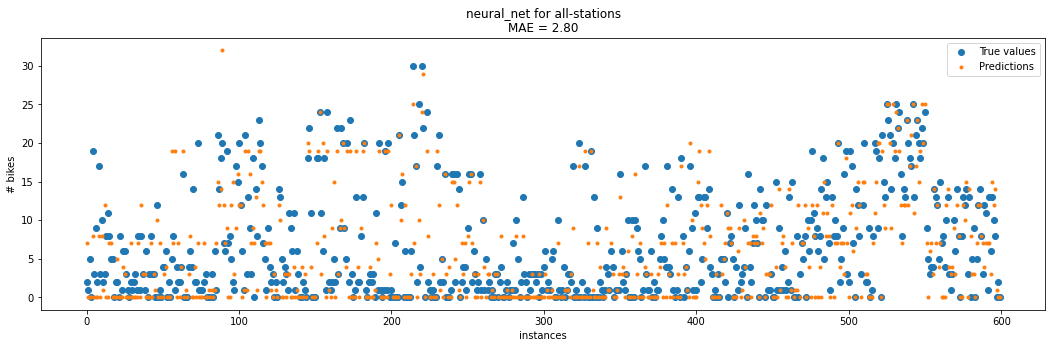

In [14]:
y_pred = all_stations_model.predict(X_val)
y_pred = np.rint(tf.argmax(y_pred, axis=1).numpy())

fig, ax = plt.subplots(1, 1, figsize=(18, 5))

plt.plot(y_val[:600], "o", label="True values")
ax.plot(y_pred[:600], ".", label="Predictions")
ax.set_xlabel("instances")
ax.set_ylabel("# bikes")
ax.legend(loc="best")
ax.set_title(
    model_name+" for all-stations\nMAE = {:.2f}".format(
        mae(y_val, y_pred).numpy()
    )
)

In [15]:
## Save the model
# joblib.dump(all_stations_model, 'all_stations_model.pkl')

## Predictions with per-station models

In [16]:
# y_pred = np.zeros_like(y_val)

# for i in range(len(y_val)):
#     station_id = stations[i]
#     tmp = per_station_models[station_id].predict(np.array([X_val[i]]))
#     y_pred[i] = np.rint(tf.argmax(tmp, axis=1).numpy())

In [17]:
# fig, ax = plt.subplots(1, 1, figsize=(18, 5))

# plt.plot(y_val[:600], "o", label="True values")
# ax.plot(y_pred[:600], ".", label="Predictions")
# ax.set_xlabel("instances")
# ax.set_ylabel("# bikes")
# ax.legend(loc="best")
# ax.set_title(
#     "Mixed models per-station\nMAE = {:.2f}".format(
#         mae(y_val, y_pred).numpy()
#     )
# )

In [18]:
## Save the models
# joblib.dump(per_station_models, 'per_station_models.pkl')

## Predictions for the competition

In [19]:
def make_test_data():
    df = pd.read_csv(INPUT_DIR+'/test.csv')
    
    de = preprocess(df)
    
    ids = df['Id']
    df = df.drop(['Id'], axis=1)
    
    station_ids = df['station']
    df = df.drop(['station'], axis=1)
    
    df = select_peters_features(df)
    
    return np.array(df), np.array(ids), np.array(station_ids)
    
X_test, ids, station_ids = make_test_data()
X_test.shape

(2250, 6)

In [20]:
## Save this data for later testing in Phase 3
np.save('X_test.npy', X_test)
np.save('ids_test.npy', ids)
np.save('stations_test.npy', station_ids)

In [21]:
""" If we chose to all stations at once """
y_pred = all_stations_model.predict(X_test)
y_pred = np.rint(tf.argmax(y_pred, axis=1).numpy())

""" If we chose one model per-station """
# y_pred = np.zeros((len(X_test)))
# for i in range(len(X_test)):
#     station_id = station_ids[i]
#     tmp = per_station_models[station_id].predict(np.array([X_test[i]]))
#     y_pred[i] = np.rint(tf.argmax(tmp, axis=1).numpy())
# np.unique(y_pred)

y_pred = np.where(y_pred<0, np.zeros_like(y_pred), y_pred)

In [22]:
results = pd.DataFrame({'Id':ids, 'bikes':np.rint(y_pred)})
results

,Id,bikes
0,1,0.0
1,2,0.0
2,3,7.0
3,4,3.0
4,5,1.0
...,...,...
2245,2246,15.0
2246,2247,15.0
2247,2248,8.0
2248,2249,20.0


In [23]:
results.to_csv('/kaggle/working/roussel_subin_submission.csv', index=False)
os.listdir('/kaggle/working/')

['stations_test.npy',
 'y_val.npy',
 '__notebook__.ipynb',
 'stations_val.npy',
 'X_test.npy',
 'roussel_subin_submission.csv',
 'ids_test.npy',
 'X_val.npy']